# <center> Case study: Survival classification with Titanic dataset </center>

## 1. Quick reviews
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Logistic Regression, Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 2. Titanic dataset
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons for the sinking of the Titanic was the lack of supplies and medical expertise. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data as explained below:

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

The goal is to predict if a passenger survived the sinking of the Titanic or not (`survived`), regarding the passenger’s attributes. 

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and quick view data

In [4]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [6]:
data = data.drop(['class','embark_town','alive'],axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True


In [7]:
data.shape

(891, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   who         891 non-null    object  
 9   adult_male  891 non-null    bool    
 10  deck        203 non-null    category
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [9]:
pd.DataFrame(data.isna().sum()/len(data)*100).T

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.224467,0.0,0.0,77.216611,0.0


In [10]:
''' -> Problem 1: Missing values (age, embarked, deck) '''

' -> Problem 1: Missing values (age, embarked, deck) '

In [11]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
''' Problem 2: Data not on same scale '''

' Problem 2: Data not on same scale '

<Axes: >

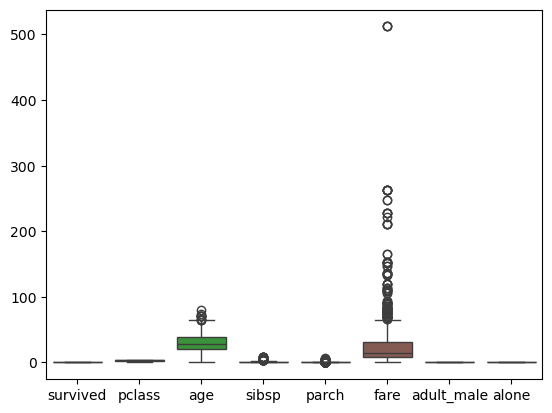

In [13]:
sns.boxplot(data=data)

<Axes: >

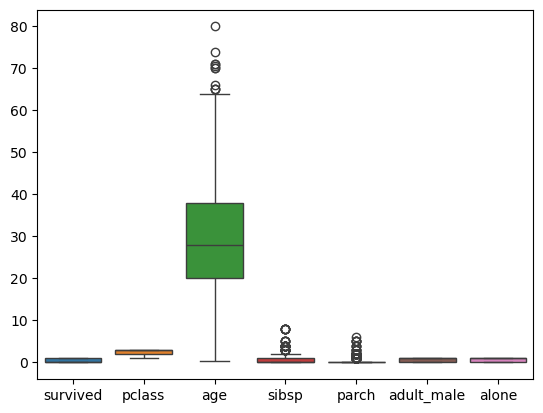

In [14]:
sns.boxplot(data=data.drop(['fare'],axis=1))

<Axes: >

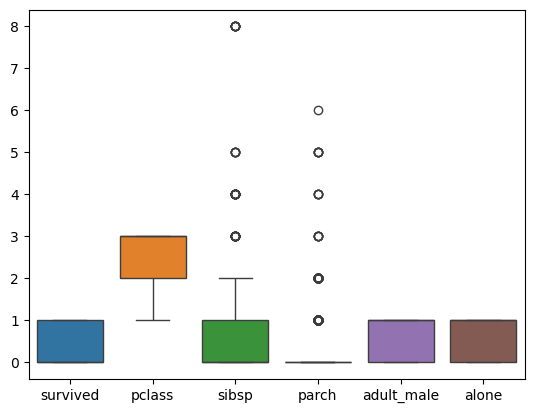

In [15]:
sns.boxplot(data=data.drop(['fare','age'],axis=1))

https://www.youtube.com/watch?v=vcbMinm_1Q8

In [16]:
''' -> Problem 3: Outliers (fare, age, sibsp, parch) '''

' -> Problem 3: Outliers (fare, age, sibsp, parch) '

In [17]:
data['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [18]:
''' -> Problem 4: Imbalanced data: survived '''

' -> Problem 4: Imbalanced data: survived '

1.5 IQR Rule

# EDA

## Descriptive analysis

In [19]:
# int64, float64 (numeric)
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# exclude = int64, float64
data.select_dtypes(exclude=['int64','float64']).describe()

,sex,embarked,who,adult_male,deck,alone
count,891,889,891,891,203,891
unique,2,3,3,2,7,2
top,male,S,man,True,C,True
freq,577,644,537,537,59,537


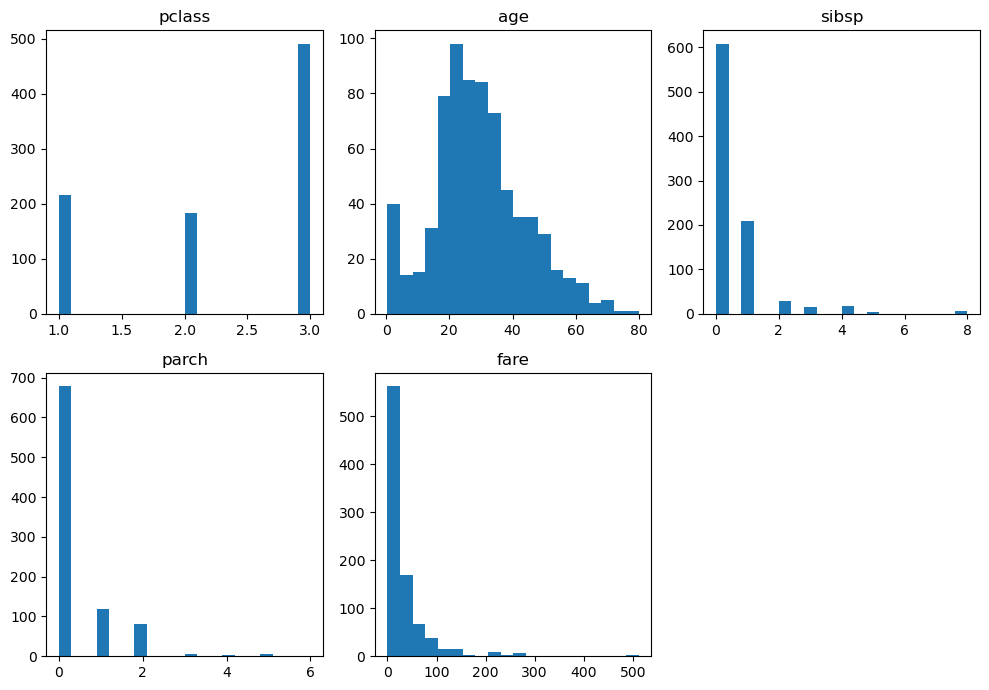

In [21]:
df_num = data.select_dtypes(['int64','float64']).drop('survived',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = int(np.ceil(df_num.shape[1] / ncols))

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=20, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

## Diagnostic Analysis

In [22]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')

<Axes: xlabel='pclass'>

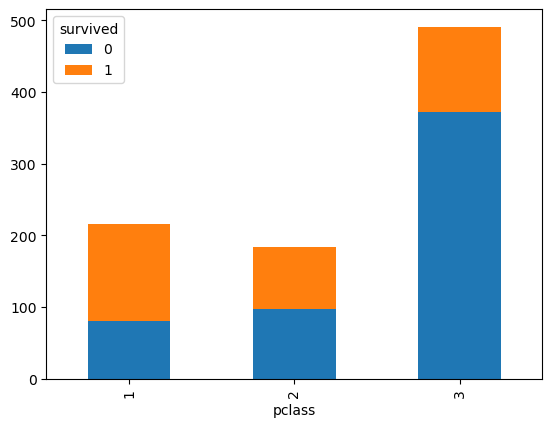

In [23]:
df = pd.pivot_table(data=data,index='pclass',columns='survived',values='who',aggfunc='count').reset_index()
df.plot(x='pclass',kind='bar',stacked=True)

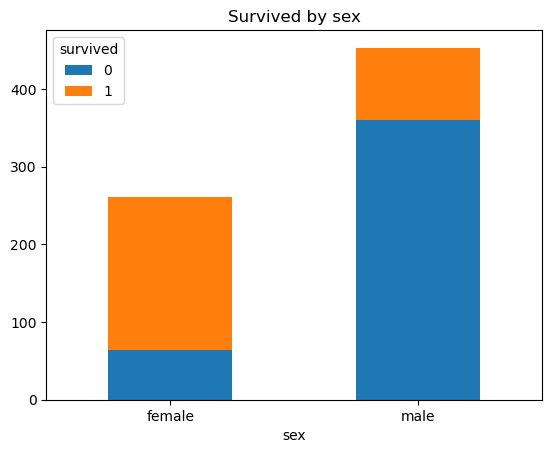

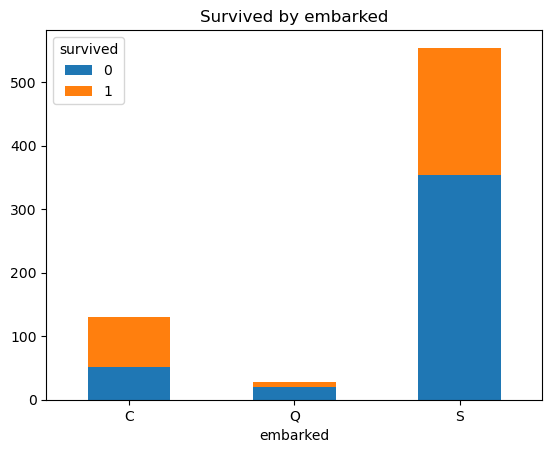

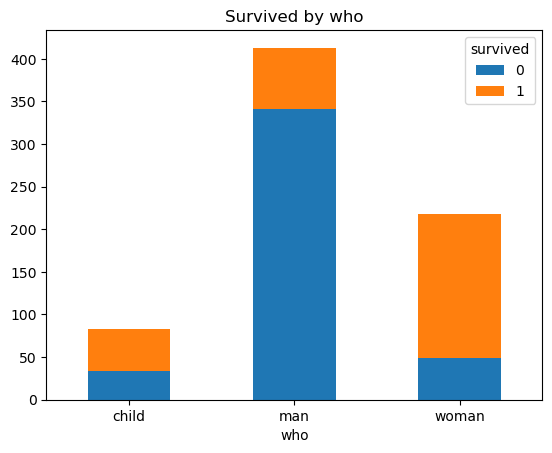

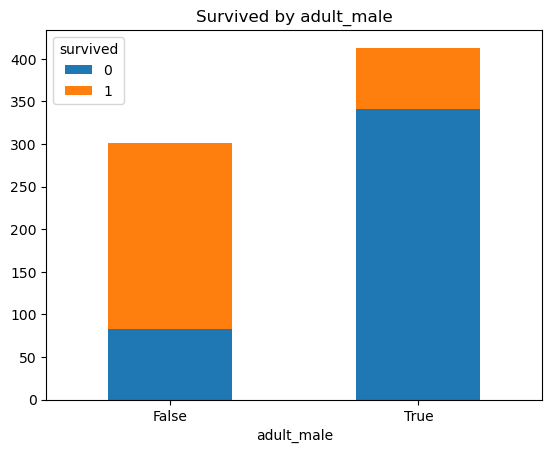

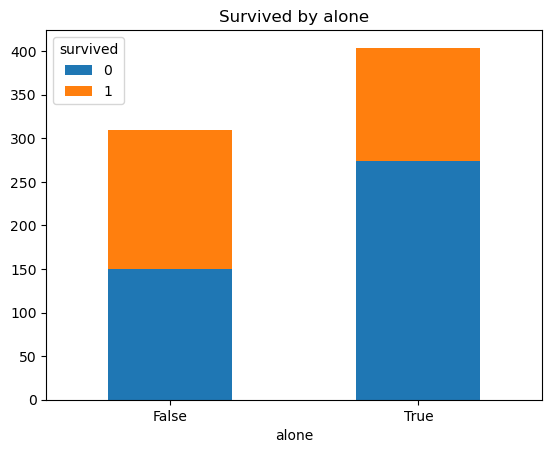

In [24]:
for c in ['sex','embarked','who','adult_male','alone']:
    df = pd.pivot_table(data=data,index=c,columns='survived',values='age',aggfunc='count').reset_index()
    df.plot(x=c,kind='bar',stacked=True)
    plt.title('Survived by {}'.format(c))
    plt.xticks(rotation=360)

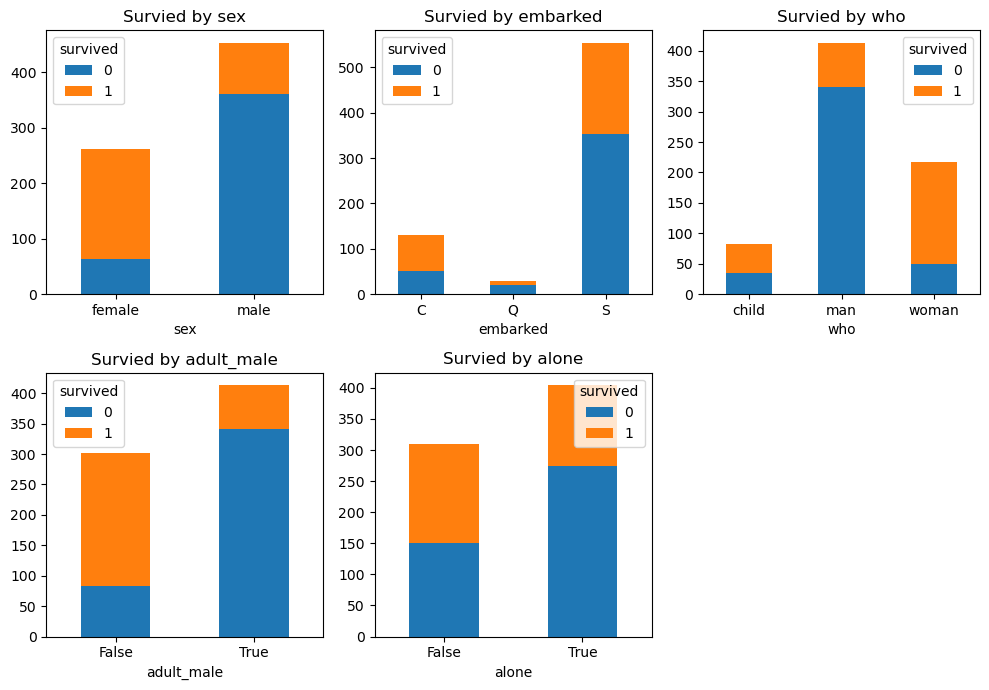

In [25]:
df = data[['sex','embarked','who','adult_male','alone']]
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = int(np.ceil(df.shape[1] / ncols))

# Add subplots
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    tmp = pd.pivot_table(data=data,index=c,columns='survived',values='age',aggfunc='count').reset_index()
    tmp.plot(x=c,kind='bar',stacked=True,ax=ax)
    ax.set_title('Survied by {}'.format(c))
    ax.set_ylabel(None)
    plt.xticks(rotation=360)

# Other
plt.tight_layout()
plt.show()

In [26]:
'''
1. female -> 1
2. C -> 1
3. man -> 0, child+woman -> 1
4. adult_male -> 0
5. alone -> 0
'''

'\n1. female -> 1\n2. C -> 1\n3. man -> 0, child+woman -> 1\n4. adult_male -> 0\n5. alone -> 0\n'

In [27]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')

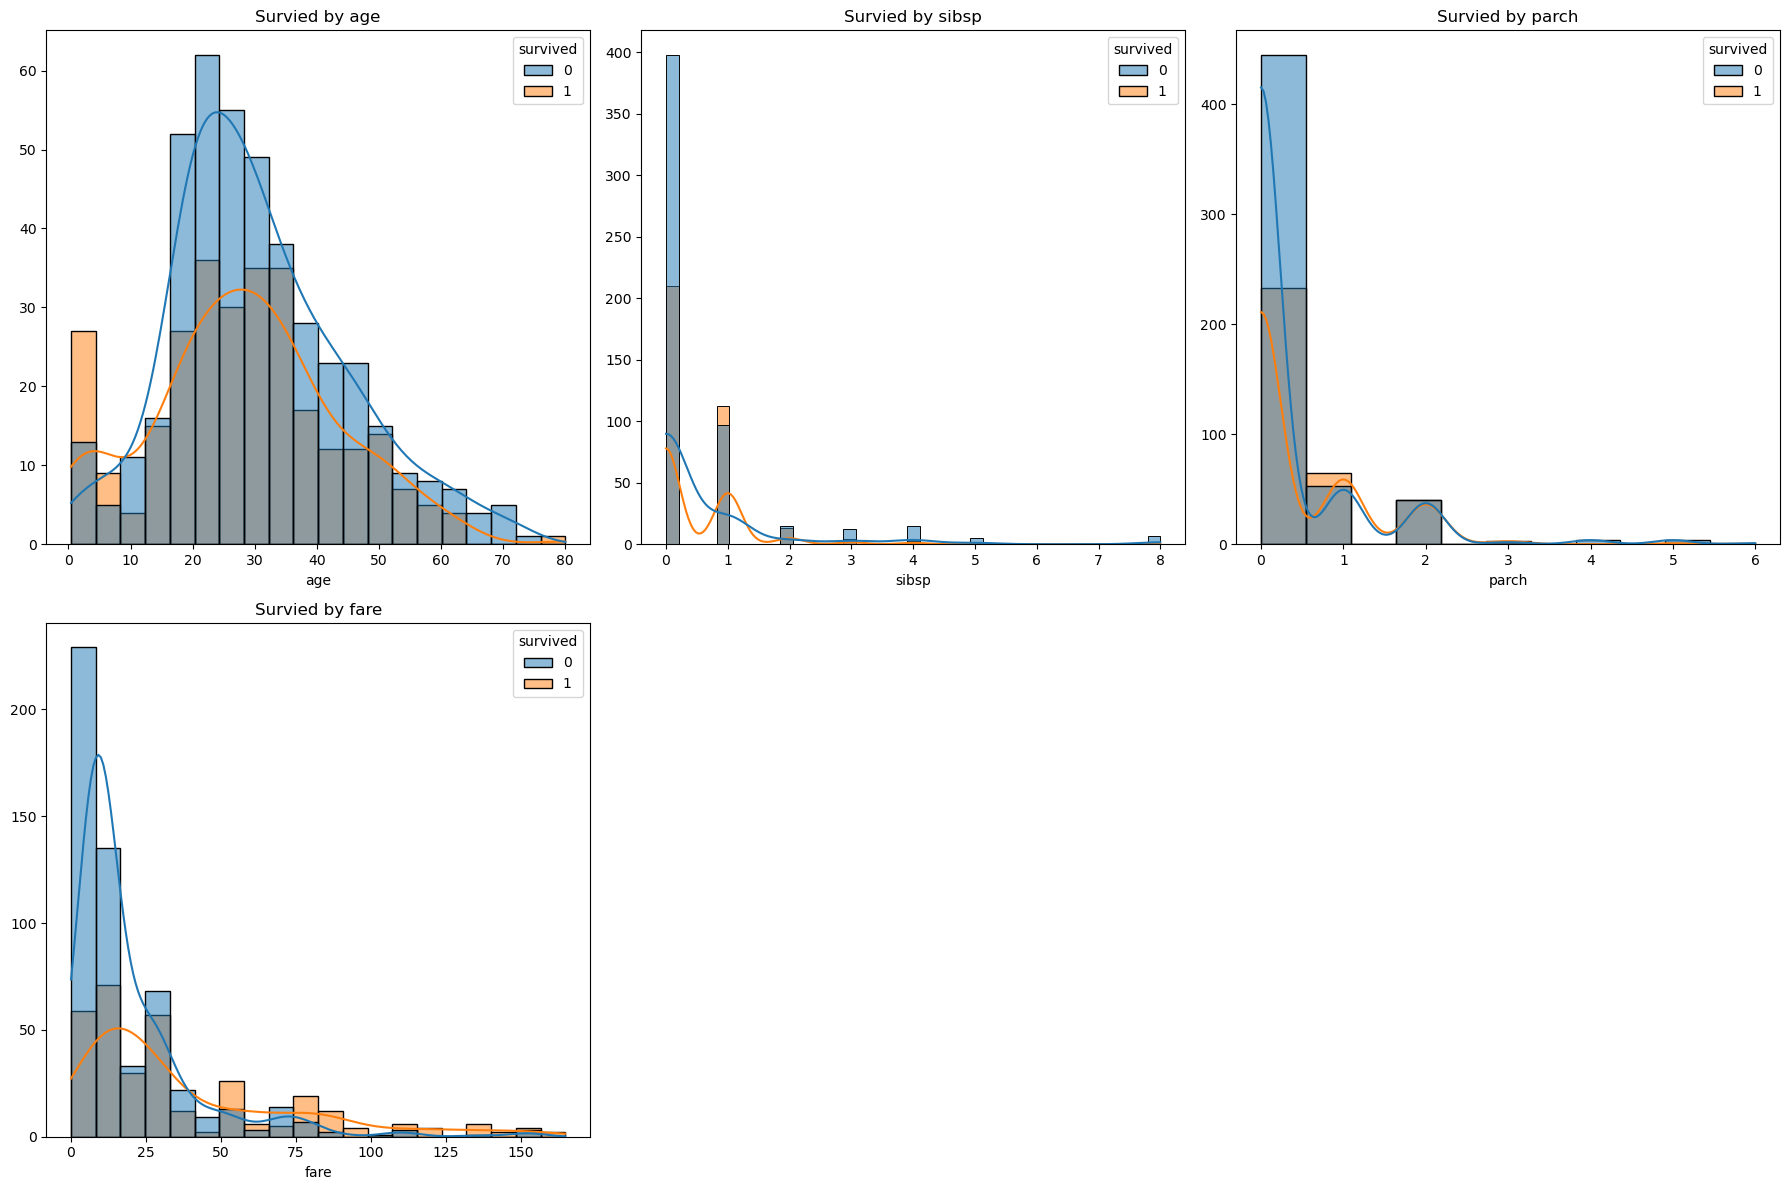

In [28]:
df = data[['age', 'sibsp', 'parch', 'fare']]
# Figure
fig = plt.figure(figsize=(18, 12))

# Define grid
ncols = 3
nrows = int(np.ceil(df.shape[1] / ncols))

# Add subplots
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    if c != 'fare':
        sns.histplot(data=data,x=c,hue='survived',kde=True,ax=ax)
    else:
        sns.histplot(data=data[data['fare']<=200],x=c,hue='survived',bins=20,kde=True,ax=ax)
    ax.set_title('Survied by {}'.format(c))
    ax.set_ylabel(None)
#     plt.xticks(rotation=360)

# Other
plt.tight_layout()
plt.show()

In [29]:
# titanic_stats = titanic.survived.value_counts()
# plt.figure(figsize = (6,6))
# plt.pie(titanic_stats, labels = titanic_stats.index, autopct = '%.2f', explode=[0,0.05], shadow=True)
# plt.title('Pie chart about survival rate')
# plt.legend()
# plt.show()

# Data preprocessing

## Handle Missing Values

### Age

- Easy imputation: mean, median, mode
- Domain imputation: 

In [30]:
## Easy imputation

<Axes: xlabel='age', ylabel='Count'>

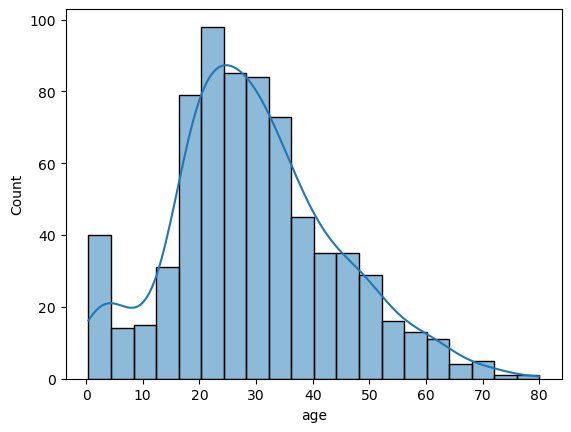

In [31]:
sns.histplot(data=data,x='age',kde=True)

In [32]:
data['age'].median()

28.0

<Axes: xlabel='age', ylabel='Count'>

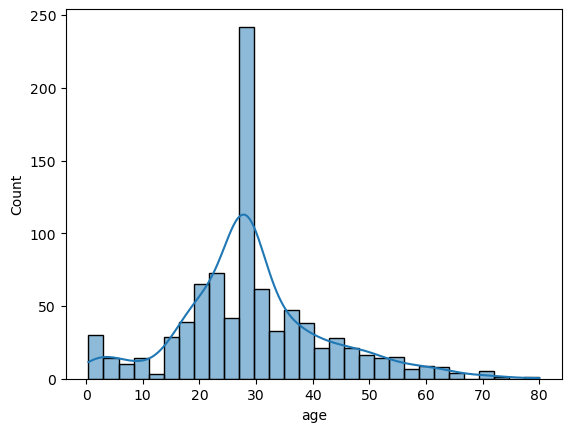

In [33]:
sns.histplot(data=data[['age']].fillna(data['age'].median()),x='age',kde=True)

In [34]:
agefill = data['age'].fillna(data['age'].median())
agefill.isna().sum()

np.int64(0)

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
# sip = SimpleImputer(strategy='median')
# sip.fit_transform(data[['age']])

In [37]:
## Domain imputation

In [38]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True


In [39]:
dna = data.groupby(['who','sibsp','parch'])['age'].agg([len,'mean',lambda x: x.isna().sum()/len(x)*100]).reset_index()
dna[dna['<lambda_0>']>0]

,who,sibsp,parch,len,mean,<lambda_0>
13,man,0,0,410,32.973597,26.097561
16,man,1,0,59,32.701923,11.864407
17,man,1,1,21,36.000000,9.523810
18,man,1,2,5,30.750000,20.000000
22,man,2,0,13,31.181818,15.384615
24,man,3,1,1,NaN,100.000000
27,man,8,2,4,NaN,100.000000
28,woman,0,0,121,31.084211,21.487603
29,woman,0,1,18,34.176471,5.555556
30,woman,0,2,15,26.833333,20.000000


In [40]:
data['age'] = data.groupby(['who','sibsp','parch'])['age'].transform(lambda x: x.fillna(x.mean()))
data['age'].isna().sum()

np.int64(11)

In [41]:
data[(data['who']=='man') & (data['sibsp']==8) & (data['parch']==2)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
159,0,3,male,NaN,8,2,69.55,S,man,True,NaN,False
201,0,3,male,NaN,8,2,69.55,S,man,True,NaN,False
324,0,3,male,NaN,8,2,69.55,S,man,True,NaN,False
846,0,3,male,NaN,8,2,69.55,S,man,True,NaN,False


In [42]:
data[data['who'].isin(['man','woman'])]['age'].mean()

np.float64(32.736297453923974)

In [43]:
age_mean = data[data['who'].isin(['man','woman'])]['age'].mean()
data['age'] = data['age'].fillna(age_mean)
data['age'].isna().sum()

np.int64(0)

### Embarked

In [44]:
data['embarked'].isna().sum()/len(data)*100

np.float64(0.22446689113355783)

In [45]:
data[data['embarked'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
61,1,1,female,38.0,0,0,80.0,NaN,woman,False,B,True
829,1,1,female,62.0,0,0,80.0,NaN,woman,False,B,True


In [46]:
data[(data['pclass']==1) & (data['sex']=='female')]['embarked'].mode()[0]

'S'

In [47]:
embarked_fill = data[(data['pclass']==1) & (data['sex']=='female')]['embarked'].mode()[0]
data['embarked'] = data['embarked'].fillna(embarked_fill)
data['embarked'].isna().sum()

np.int64(0)

### Deck

In [48]:
data['deck'].isna().sum()/len(data)*100

np.float64(77.21661054994388)

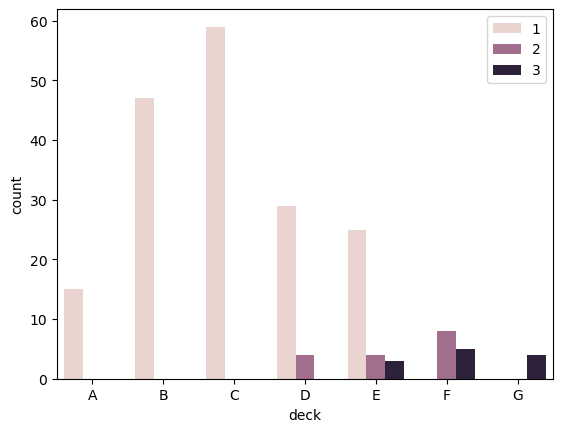

In [49]:
sns.countplot(data=data,x='deck',hue='pclass')
plt.legend(loc='upper right')

In [50]:
dict_deck = {1: 'C', 2: 'F', 3: 'F'}
ser = data['pclass'].map(dict_deck)
ser.head()

0    F
1    C
2    F
3    C
4    F
Name: pclass, dtype: object

In [51]:
data['deck'] = data['deck'].combine_first(ser)
data['deck'].head()

0    F
1    C
2    F
3    C
4    F
Name: deck, dtype: object

In [52]:
data['deck'].isna().sum()

np.int64(0)

## 2. Outliers

- **Trimming**: easier
- **Capping**

Text(0.5, 1.0, 'Fare Distribution')

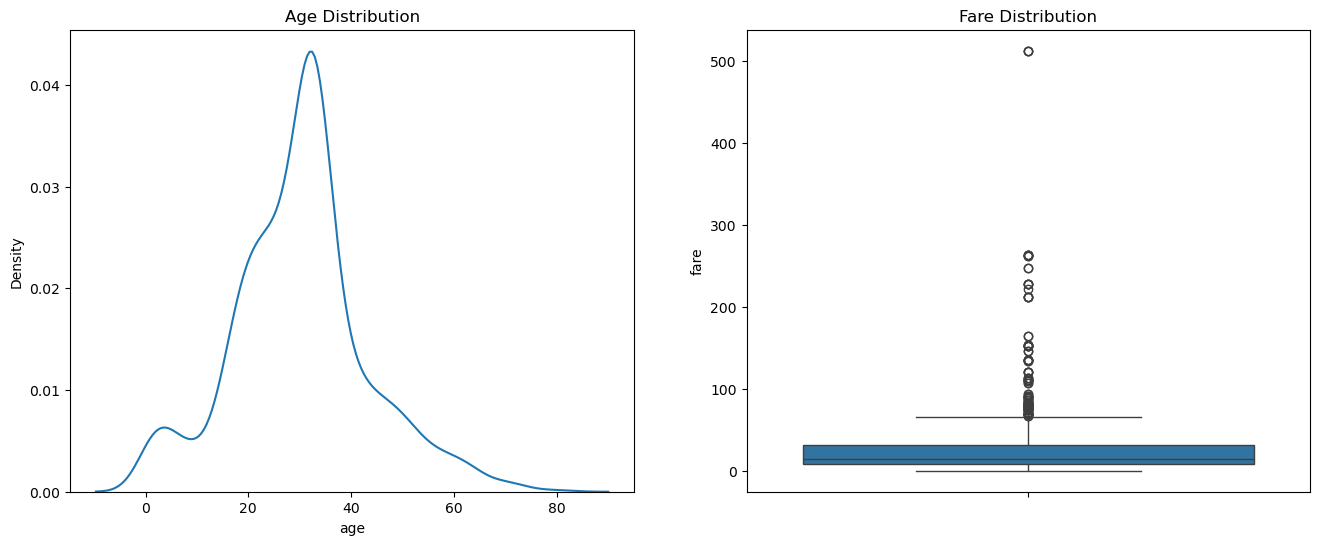

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)

sns.kdeplot(data=data,x='age')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.boxplot(data=data['fare'])
plt.title('Fare Distribution')

##### Trimming

In [54]:
age_lower_limit = data['age'].mean() - 3 * data['age'].std()
age_upper_limit = data['age'].mean() + 3 * data['age'].std()

age_lower_limit, age_upper_limit

(np.float64(-8.91304735273836), np.float64(69.47331299307633))

In [55]:
age_normal_new = data[(data['age'] >= age_lower_limit) & (data['age'] <= age_upper_limit)]

In [56]:
len(data), len(age_normal_new)

(891, 884)

Text(0.5, 1.0, 'Age Distribution New')

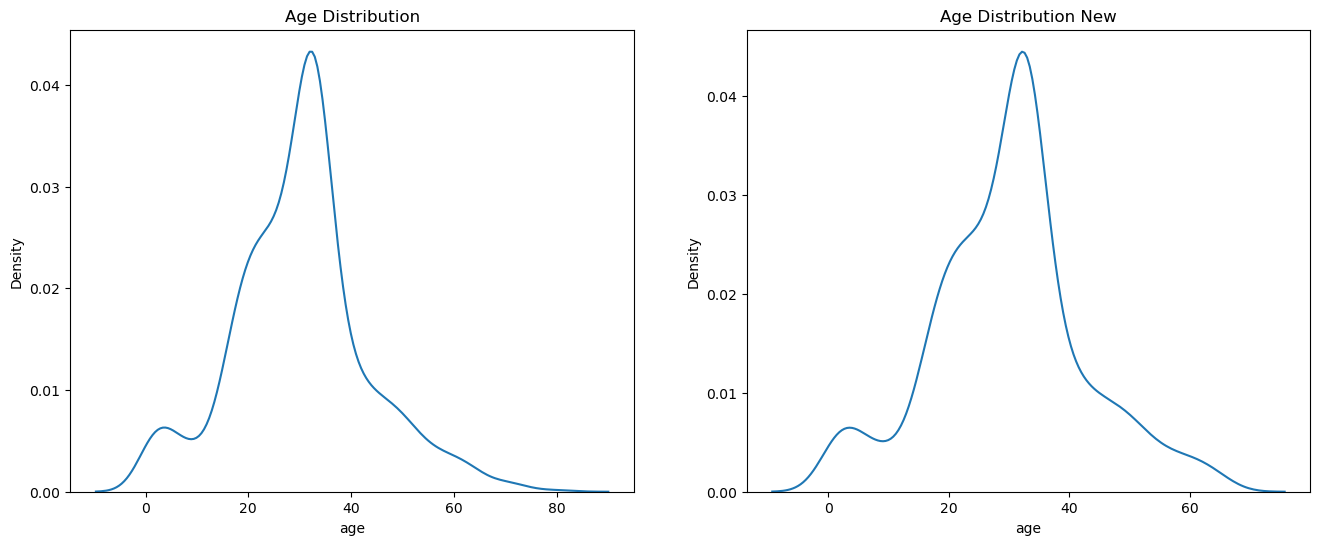

In [57]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(data=data,x='age')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.kdeplot(data=age_normal_new,x='age')
plt.title('Age Distribution New')

##### Capping

In [58]:
# IQR = 75% (q3) - 25% (q1)
# 75% + 1.5IQR
# 25% - 1.5IQR

In [59]:
q3 = data['fare'].quantile(0.75)
q1 = data['fare'].quantile(0.25)

IQR = q3 - q1

fare_lower_limit = q1 - 1.5*IQR
fare_upper_limit = q3 + 1.5*IQR

fare_lower_limit, fare_upper_limit

(np.float64(-26.724), np.float64(65.6344))

In [60]:
fare_new = pd.DataFrame(np.where(data['fare'] > fare_upper_limit, fare_upper_limit, 
                                 np.where(data['fare'] < fare_lower_limit, fare_lower_limit, data['fare'])),columns=['fare_new'])
fare_new

,fare_new
0,7.2500
1,65.6344
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


<Axes: title={'center': 'boxplot after capping'}, ylabel='fare_new'>

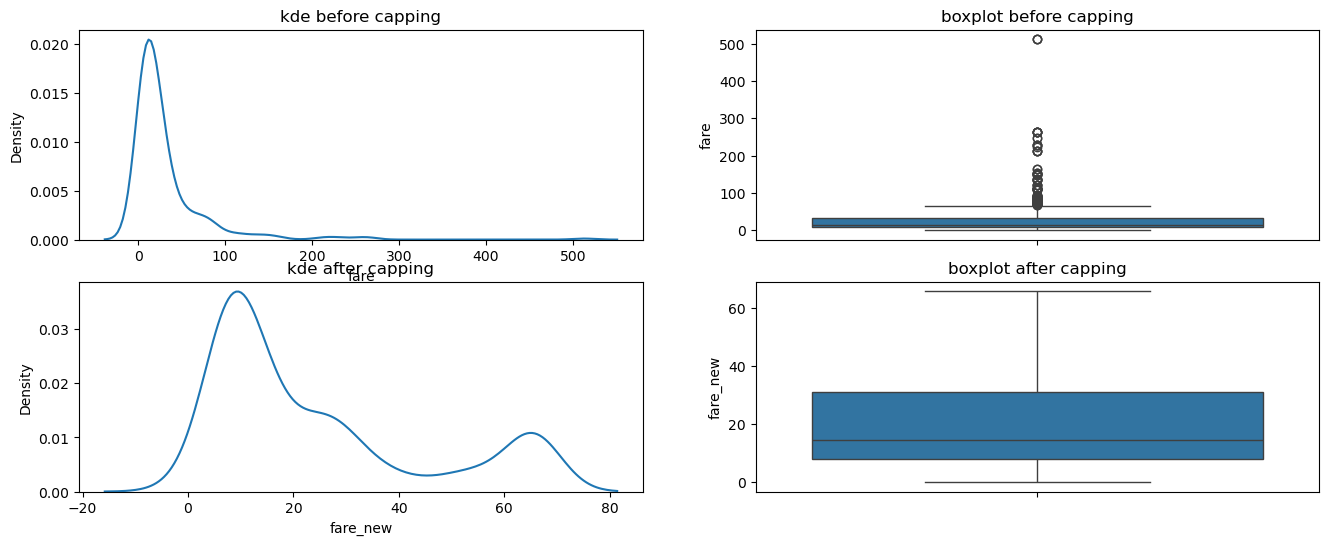

In [61]:
plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
plt.title('kde before capping')
sns.kdeplot(data=data['fare'])

plt.subplot(2,2,2)
plt.title('boxplot before capping')
sns.boxplot(data=data['fare'])

plt.subplot(2,2,3)
plt.title('kde after capping')
sns.kdeplot(data=fare_new['fare_new'])

plt.subplot(2,2,4)
plt.title('boxplot after capping')
sns.boxplot(data=fare_new['fare_new'])

## 3. Scale data

# Standard Scaler
![](https://i.stack.imgur.com/Yr42l.png)

# MinMax Scaler
![](https://androidkt.com/wp-content/uploads/2020/10/Selection_060.png)

# Robust Scaler
![](https://i.stack.imgur.com/G3V7C.png)

# Distribution after scaling
![](https://curiousily.com/static/c9cf00949c60d2eacb1fb27d24d1544d/3e3fe/scaling-overview.png)

![](https://miro.medium.com/max/1400/1*A9d4SEX0t_bAAPzZeVqwAQ.png)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
data['fare'] = scaler.fit_transform(data[['fare']])

<Axes: xlabel='fare', ylabel='Density'>

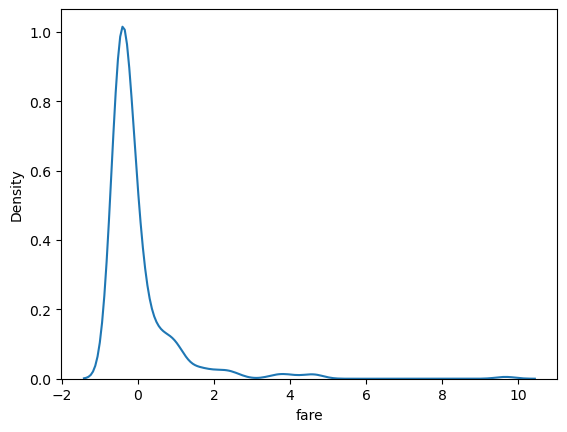

In [64]:
sns.kdeplot(data=data['fare'])

## 4. Feature transformation

In [65]:
# Age [0,100] -> group 5 nhom
# pd.qcut() pd.cut()

<Axes: xlabel='age', ylabel='Count'>

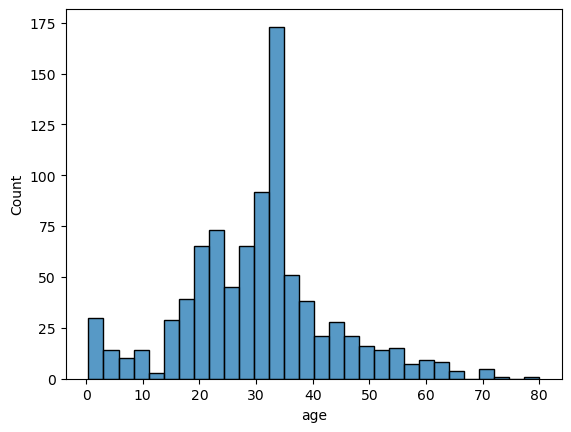

In [66]:
sns.histplot(data=data['age'])

In [67]:
age_range = [0,15,35,45,60,80,100]
data['age_range'] = pd.cut(data['age'],bins=age_range)
data[['age','age_range']]

,age,age_range
0,22.000000,"(15, 35]"
1,38.000000,"(35, 45]"
2,26.000000,"(15, 35]"
3,35.000000,"(15, 35]"
4,35.000000,"(15, 35]"
...,...,...
886,27.000000,"(15, 35]"
887,19.000000,"(15, 35]"
888,31.333333,"(15, 35]"
889,26.000000,"(15, 35]"


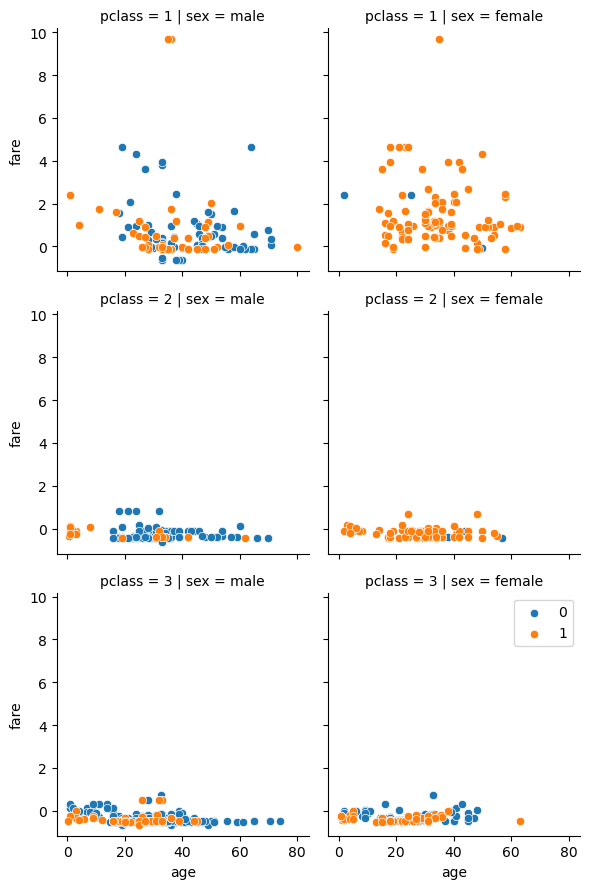

In [68]:
grid = sns.FacetGrid(data=data,row='pclass',col='sex',hue='survived')
grid.map(sns.scatterplot,'age','fare')
plt.legend(loc='upper right')
plt.show()

In [69]:
filter1 = data['sex'] == 'female'

filter2 = data['pclass'] <= 2

data['female_top_class'] = (filter1 & filter2)

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone,age_range,female_top_class
0,0,3,male,22.0,1,0,-0.502445,S,man,True,F,False,"(15, 35]",False
1,1,1,female,38.0,1,0,0.786845,C,woman,False,C,False,"(35, 45]",True
2,1,3,female,26.0,0,0,-0.488854,S,woman,False,F,True,"(15, 35]",False
3,1,1,female,35.0,1,0,0.420730,S,woman,False,C,False,"(15, 35]",True
4,0,3,male,35.0,0,0,-0.486337,S,man,True,F,True,"(15, 35]",False


In [70]:
# 'sex','adult_male','alone','female_top_class'

data['sex'] = data['sex'].map({'female':1,'male':0})
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone,age_range,female_top_class
0,0,3,0,22.0,1,0,-0.502445,S,man,True,F,False,"(15, 35]",False
1,1,1,1,38.0,1,0,0.786845,C,woman,False,C,False,"(35, 45]",True
2,1,3,1,26.0,0,0,-0.488854,S,woman,False,F,True,"(15, 35]",False
3,1,1,1,35.0,1,0,0.420730,S,woman,False,C,False,"(15, 35]",True
4,0,3,0,35.0,0,0,-0.486337,S,man,True,F,True,"(15, 35]",False


In [71]:
for c in ['adult_male','alone','female_top_class']:
    data[c] = data[c].astype(int)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone,age_range,female_top_class
0,0,3,0,22.0,1,0,-0.502445,S,man,1,F,0,"(15, 35]",0
1,1,1,1,38.0,1,0,0.786845,C,woman,0,C,0,"(35, 45]",1
2,1,3,1,26.0,0,0,-0.488854,S,woman,0,F,1,"(15, 35]",0
3,1,1,1,35.0,1,0,0.420730,S,woman,0,C,0,"(15, 35]",1
4,0,3,0,35.0,0,0,-0.486337,S,man,1,F,1,"(15, 35]",0


In [72]:
data = data.join(pd.get_dummies(data[['embarked','who','age_range']]))
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,...,embarked_S,who_child,who_man,who_woman,"age_range_(0, 15]","age_range_(15, 35]","age_range_(35, 45]","age_range_(45, 60]","age_range_(60, 80]","age_range_(80, 100]"
0,0,3,0,22.0,1,0,-0.502445,S,man,1,...,True,False,True,False,False,True,False,False,False,False
1,1,1,1,38.0,1,0,0.786845,C,woman,0,...,False,False,False,True,False,False,True,False,False,False
2,1,3,1,26.0,0,0,-0.488854,S,woman,0,...,True,False,False,True,False,True,False,False,False,False
3,1,1,1,35.0,1,0,0.420730,S,woman,0,...,True,False,False,True,False,True,False,False,False,False
4,0,3,0,35.0,0,0,-0.486337,S,man,1,...,True,False,True,False,False,True,False,False,False,False


In [73]:
pd.set_option('display.max_columns',None)

In [74]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone,age_range,female_top_class,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,"age_range_(0, 15]","age_range_(15, 35]","age_range_(35, 45]","age_range_(45, 60]","age_range_(60, 80]","age_range_(80, 100]"
0,0,3,0,22.0,1,0,-0.502445,S,man,1,F,0,"(15, 35]",0,False,False,True,False,True,False,False,True,False,False,False,False
1,1,1,1,38.0,1,0,0.786845,C,woman,0,C,0,"(35, 45]",1,True,False,False,False,False,True,False,False,True,False,False,False
2,1,3,1,26.0,0,0,-0.488854,S,woman,0,F,1,"(15, 35]",0,False,False,True,False,False,True,False,True,False,False,False,False
3,1,1,1,35.0,1,0,0.420730,S,woman,0,C,0,"(15, 35]",1,False,False,True,False,False,True,False,True,False,False,False,False
4,0,3,0,35.0,0,0,-0.486337,S,man,1,F,1,"(15, 35]",0,False,False,True,False,True,False,False,True,False,False,False,False


In [75]:
data['deck'].map({
    'A':1,
    'B':1,
    'C':1,
    'D':0,
    'E':0,
    'F':0,
    'G':0,
}).astype(int)

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: deck, Length: 891, dtype: int64

In [76]:
data['deck_ABC'] = data['deck'].isin(['A','B','C']).astype(int)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone,age_range,female_top_class,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,"age_range_(0, 15]","age_range_(15, 35]","age_range_(35, 45]","age_range_(45, 60]","age_range_(60, 80]","age_range_(80, 100]",deck_ABC
0,0,3,0,22.0,1,0,-0.502445,S,man,1,F,0,"(15, 35]",0,False,False,True,False,True,False,False,True,False,False,False,False,0
1,1,1,1,38.0,1,0,0.786845,C,woman,0,C,0,"(35, 45]",1,True,False,False,False,False,True,False,False,True,False,False,False,1
2,1,3,1,26.0,0,0,-0.488854,S,woman,0,F,1,"(15, 35]",0,False,False,True,False,False,True,False,True,False,False,False,False,0
3,1,1,1,35.0,1,0,0.420730,S,woman,0,C,0,"(15, 35]",1,False,False,True,False,False,True,False,True,False,False,False,False,1
4,0,3,0,35.0,0,0,-0.486337,S,man,1,F,1,"(15, 35]",0,False,False,True,False,True,False,False,True,False,False,False,False,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   survived             891 non-null    int64   
 1   pclass               891 non-null    int64   
 2   sex                  891 non-null    int64   
 3   age                  891 non-null    float64 
 4   sibsp                891 non-null    int64   
 5   parch                891 non-null    int64   
 6   fare                 891 non-null    float64 
 7   embarked             891 non-null    object  
 8   who                  891 non-null    object  
 9   adult_male           891 non-null    int64   
 10  deck                 891 non-null    object  
 11  alone                891 non-null    int64   
 12  age_range            891 non-null    category
 13  female_top_class     891 non-null    int64   
 14  embarked_C           891 non-null    bool    
 15  embarked_Q           89

In [78]:
data = data.drop(['embarked','who','deck','age_range'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   pclass               891 non-null    int64  
 2   sex                  891 non-null    int64  
 3   age                  891 non-null    float64
 4   sibsp                891 non-null    int64  
 5   parch                891 non-null    int64  
 6   fare                 891 non-null    float64
 7   adult_male           891 non-null    int64  
 8   alone                891 non-null    int64  
 9   female_top_class     891 non-null    int64  
 10  embarked_C           891 non-null    bool   
 11  embarked_Q           891 non-null    bool   
 12  embarked_S           891 non-null    bool   
 13  who_child            891 non-null    bool   
 14  who_man              891 non-null    bool   
 15  who_woman            891 non-null    boo

In [79]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,female_top_class,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,"age_range_(0, 15]","age_range_(15, 35]","age_range_(35, 45]","age_range_(45, 60]","age_range_(60, 80]","age_range_(80, 100]",deck_ABC
0,0,3,0,22.0,1,0,-0.502445,1,0,0,False,False,True,False,True,False,False,True,False,False,False,False,0
1,1,1,1,38.0,1,0,0.786845,0,0,1,True,False,False,False,False,True,False,False,True,False,False,False,1
2,1,3,1,26.0,0,0,-0.488854,0,1,0,False,False,True,False,False,True,False,True,False,False,False,False,0
3,1,1,1,35.0,1,0,0.420730,0,0,1,False,False,True,False,False,True,False,True,False,False,False,False,1
4,0,3,0,35.0,0,0,-0.486337,1,1,0,False,False,True,False,True,False,False,True,False,False,False,False,0


## 5. Imbalanced labels

- Before:
    + Down sampling
    + Up sampling
    + Robust sampling
- Inside:
    param: 
        class_weighted (), imbalanced

Train model

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('survived',axis=1),data['survived'],\
                                                   test_size=0.2,shuffle=True,random_state=42)

In [82]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [83]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [84]:
model.predict_proba(X_test)[:5]

array([[0.89272032, 0.10727968],
       [0.80529062, 0.19470938],
       [0.89680998, 0.10319002],
       [0.0323724 , 0.9676276 ],
       [0.25759555, 0.74240445]])

Confusion matrix

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [86]:
confusion_matrix(y_test,y_pred)

array([[93, 12],
       [19, 55]])

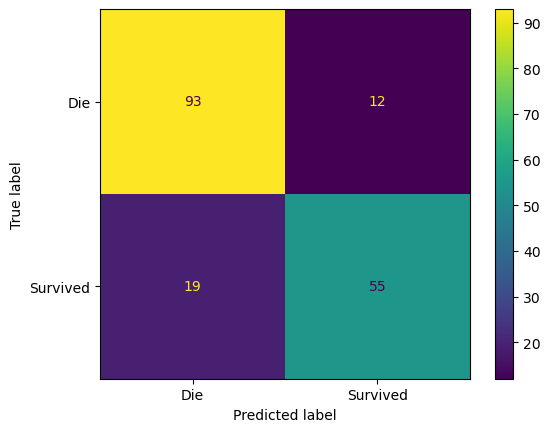

In [87]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Die','Survived'])

Accuracy score

Precision & Recall

In [88]:
accuracy_score(y_test,y_pred)

0.8268156424581006

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



actual: 500 -> Survive

predict:
100: survive
70: true survive

precision = 70%
recall = 70 / 500

f1_score
accuracy score

Feature selection

In [90]:
from sklearn.feature_selection import RFE

In [91]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('pclass', np.True_, np.int64(1)),
 ('sex', np.False_, np.int64(12)),
 ('age', np.False_, np.int64(17)),
 ('sibsp', np.False_, np.int64(4)),
 ('parch', np.False_, np.int64(9)),
 ('fare', np.False_, np.int64(11)),
 ('adult_male', np.True_, np.int64(1)),
 ('alone', np.False_, np.int64(8)),
 ('female_top_class', np.True_, np.int64(1)),
 ('embarked_C', np.False_, np.int64(10)),
 ('embarked_Q', np.False_, np.int64(14)),
 ('embarked_S', np.True_, np.int64(1)),
 ('who_child', np.False_, np.int64(7)),
 ('who_man', np.True_, np.int64(1)),
 ('who_woman', np.False_, np.int64(6)),
 ('age_range_(0, 15]', np.False_, np.int64(5)),
 ('age_range_(15, 35]', np.False_, np.int64(16)),
 ('age_range_(35, 45]', np.False_, np.int64(13)),
 ('age_range_(45, 60]', np.False_, np.int64(3)),
 ('age_range_(60, 80]', np.False_, np.int64(15)),
 ('age_range_(80, 100]', np.False_, np.int64(18)),
 ('deck_ABC', np.False_, np.int64(2))]

In [93]:
X_train.columns[rfe.support_].to_list()

['pclass', 'adult_male', 'female_top_class', 'embarked_S', 'who_man']

In [94]:
model = LogisticRegression(max_iter=1000)
col = X_train.columns[rfe.support_].to_list()
model.fit(X_train[col],y_train)
y_pred2 = model.predict(X_test[col])

In [95]:
accuracy_score(y_test,y_pred2)

0.8044692737430168

In [96]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('model',LogisticRegression())])

In [106]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

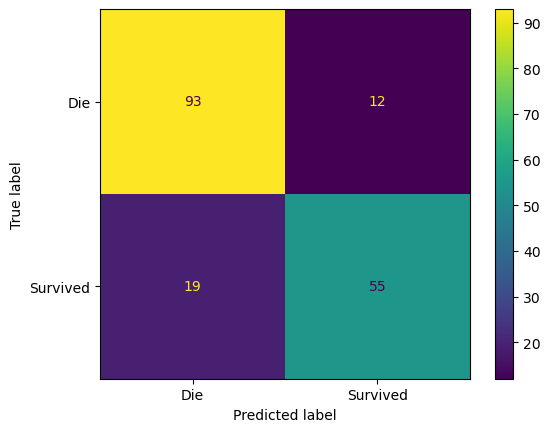

In [107]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, display_labels=['Die','Survived'])

In [108]:
y_pred3 = pipe.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

